<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Diplomado de Análisis de datos y Machine Learning en Python - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> , <a href="mailto:semilleroscen@udea.edu.co"> ✉ Semilleros Facultad de Ciencias Exactas y Naturales </a><br>

Versión actualizada: 5-09-2020
</div>

<br>

**El presente curso hace parte del centro de Big Data de la Facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 4 horas los días sábado por Google Meet. Para un total de dedicación temporal de 45 horas. El curso cuenta con los siguientes módulos:

1. Introducción a Python (9H)
2. Datos y pre-procesado (9H)
3. Análisis exploratorio (9H)
4. Desarrollo del modelo (9H)
5. Machine learning (9H)



#**Usar un dataframe de Colab**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = "/content/sample_data/california_housing_test.csv"
california_test = pd.read_csv(path)

In [ ]:
california_test.shape

(3000, 9)

In [ ]:
path = "/content/sample_data/california_housing_train.csv"
california_train = pd.read_csv(path)

In [ ]:
california_train.shape

(17000, 9)

In [ ]:
california_test.sort_values(by='population')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2640,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.5360,275000.0
1115,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0
740,-117.12,32.66,52.0,16.0,4.0,8.0,3.0,1.1250,60000.0
1355,-117.11,32.66,52.0,25.0,5.0,14.0,9.0,1.6250,118800.0
2494,-118.44,34.04,49.0,32.0,7.0,14.0,7.0,2.1875,225000.0
...,...,...,...,...,...,...,...,...,...
1597,-117.12,33.49,4.0,21988.0,4055.0,8824.0,3252.0,3.9963,191100.0
2429,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,174300.0
1146,-117.27,33.15,4.0,23915.0,4135.0,10877.0,3958.0,4.6357,244900.0
2186,-116.14,34.45,12.0,8796.0,1721.0,11139.0,1680.0,2.2612,137500.0


In [ ]:
path = "/content/sample_data/mnist_test.csv"
mnist = pd.read_csv(path)

In [ ]:
mnist.shape

(9999, 785)

In [ ]:
mnist.columns = ['target'] + list(range(0,784))

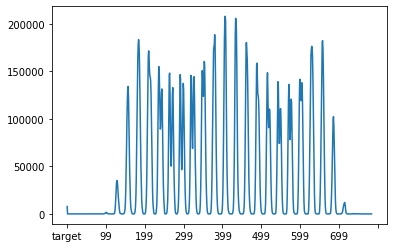

In [ ]:
mnist[mnist.target==8].sum().plot()

In [ ]:
try:
  path = "/content/Eclipses_rd.csv"
  eclipses = pd.read_csv(path)
  eclipses
except Exception as err:
  print(err)

# **Ejemplo con una serie de tiempo**

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lectura de una base de datos en internet y asignación a la variable df.
path = "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s02/multiTimeline.csv"
df = pd.read_csv(path, skiprows=1)

In [ ]:
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


El argumento `skiprows` se introduce con el fin de no incluir la primera columna.

Se puede usar también el método `.info()` para revizar los tipos de datos, el número de columnas y más:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


El siguiente paso es organizar los datos de tendencias de google, antes de realizar el análisis de estos.

## Data Wrangling

Lo primero que debemos hacer es modificar los nombres de las columnas con el fin de evitar espacios dentro de ellos. Para realizar lo anterior, podemos usar reasignar a df.columns una lista con el nombre de las columnas que deseemos.

In [ ]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


Posteriormente, convertimos la columna month en un tipo de dato DateTime para convertirlo en el índice del DataFrame.

Usaremos el método .to_datetime() para convertir la columna 'mes' del DataFrame a DateTime.

Se debe tener cuidado de incluir el argumento inplace cuando configure el índice del DataFrame df para que realmente modifique el índice original y lo configure en la columna 'mes'.

In [ ]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True) #inplace --> las funciones de DF hacen copias... 
#df = df.set_index()
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


## Exploración de los datos

A continuación, visualicemos todos los datos de la tabla mediante el método plot de panda:

Text(0.5, 0, 'Year')

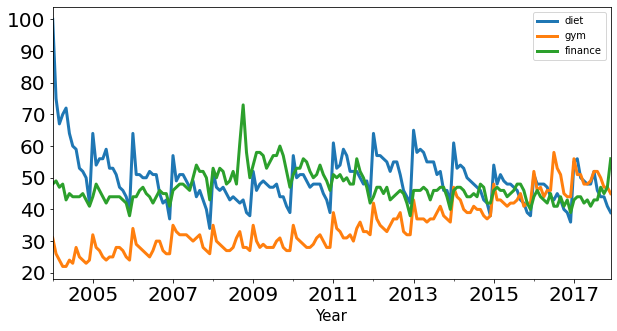

In [ ]:
#DataFrames.plot()
df.plot(figsize=(10,5), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=15)

Si se quiere visualizar solo una columna de los datos, se debe especificar como una lista:

In [ ]:
type(df['diet']) #Seleccionar una fila o columna de DataFrame == Serie

pandas.core.series.Series

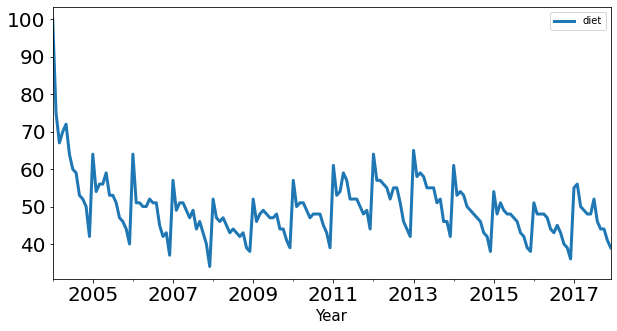

In [ ]:
df[['diet']].plot(figsize=(10,5), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=15);

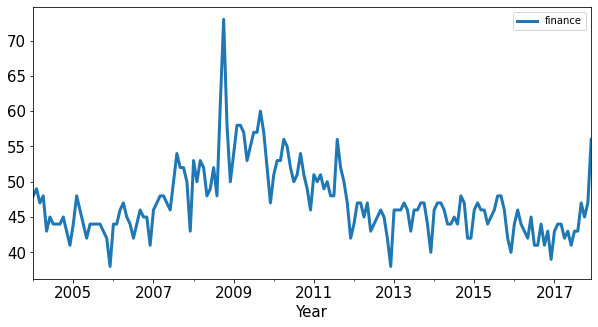

In [ ]:
df.plot(y='finance',figsize=(10,5), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=15);

Podemos incluir mas de una columna en la lista

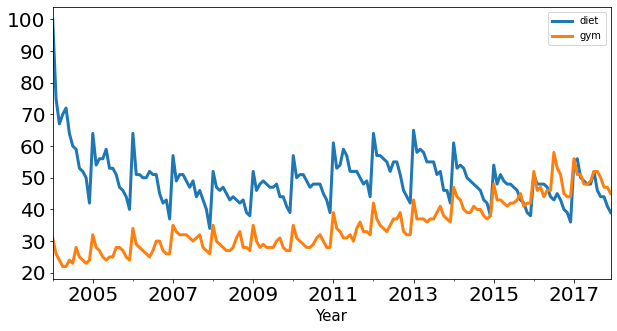

In [ ]:
df[['diet','gym']].plot(figsize=(10,5), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=15);

## Caracterizando


### Tendencias

Hay varias formas de identificar tendencias en series de tiempo. Una forma popular es tomar un promedio móvil, lo que significa que, para cada punto de tiempo, se toma el promedio de los puntos a cada lado (el número de puntos se especifica mediante un tamaño de ventana, que debe elegir).

Empecemos por realizar el promedio movil dentro de una ventana de puntos variables, en la columna 'diet', con el fin de observar lo que realiza el este método en los datos. 

In [ ]:
df.rolling(3).mean().head()

,diet,gym,finance
month,,,
2004-01-01,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN
2004-03-01,80.666667,27.000000,48.0
2004-04-01,70.666667,24.000000,48.0
2004-05-01,69.666667,22.666667,46.0


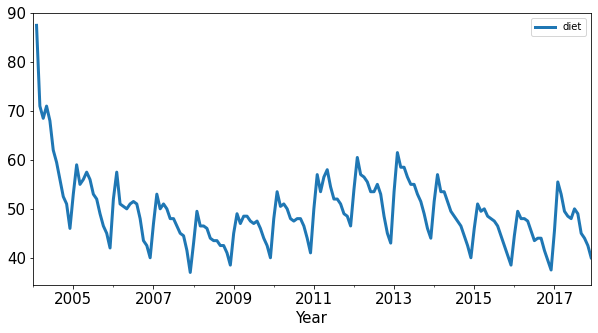

In [ ]:
diet = df[['diet']]
diet.rolling(2).mean().plot(figsize=(10,5), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=15);

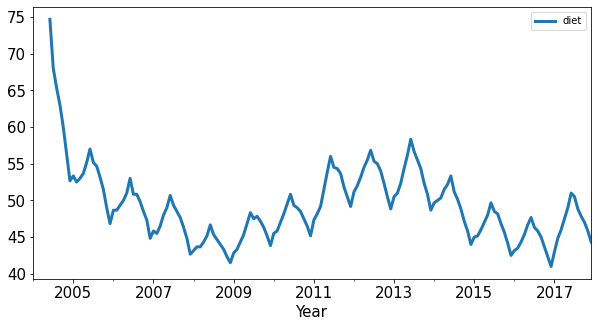

In [ ]:
diet = df[['diet']]
diet.rolling(6).mean().plot(figsize=(10,5), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=15);

### Estacionalidad

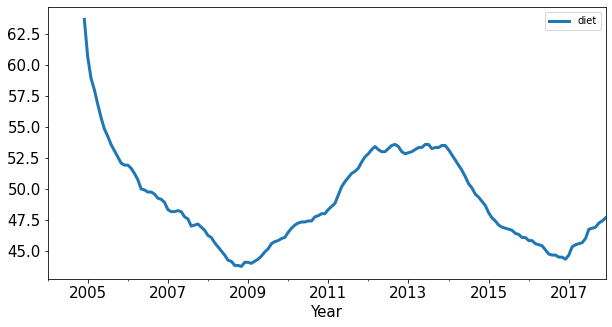

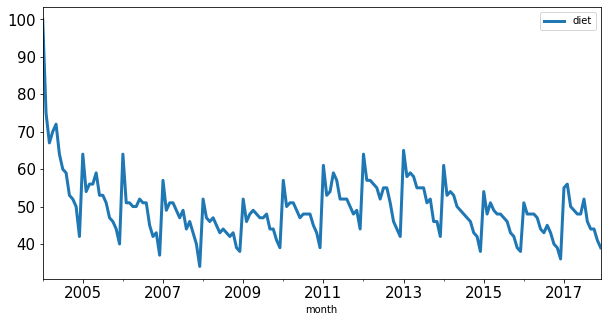

In [ ]:
diet = df[['diet']]
ax = diet.rolling(12).mean().plot(figsize=(10,5), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=15);
diet.plot(figsize=(10,5), linewidth=3, fontsize=15)

Veamos la tendendia en la variable 'gym'

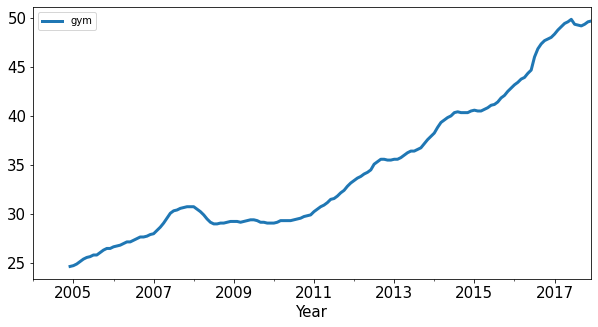

In [ ]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(10,5), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=15);

Mediante este promediado movil hemos eliminado la estacionalidad en los datos y puede observarse una tendencia al alsa en los datos 'gym'. No obstante, persiste la inquitud de cómo se comportan estos dos conjuntos de datos. Para ello, podemos graficar ambos conjuntos en una sola figura. Procedamos a construimos un nuevo DataFrame concatenando que contenga las columnas con el promedio móvil de 'diet' y 'dimnasio' mediante la función pd.concat(), que toma una lista de las columnas como primer argumento y se concatenan con el metodo .concat(), a lo largo del eje de las columnas.

In [ ]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis='columns')
df_rm.head(20)

,diet,gym
month,,
2004-01-01,NaN,NaN
2004-02-01,NaN,NaN
2004-03-01,NaN,NaN
2004-04-01,NaN,NaN
2004-05-01,NaN,NaN
2004-06-01,NaN,NaN
2004-07-01,NaN,NaN
2004-08-01,NaN,NaN
2004-09-01,NaN,NaN


A continuación, graficamos los datos mediante el método `plot()`, tal y como se realizó anteriormente. 

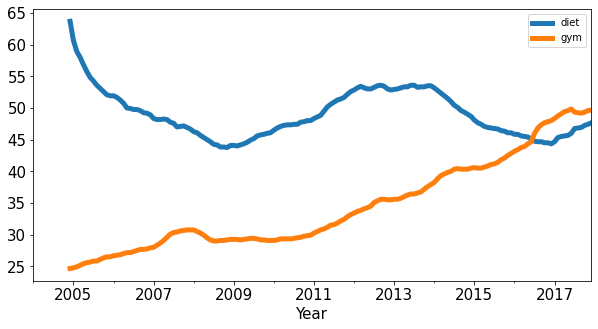

In [ ]:
df_rm.plot(figsize=(10,5), linewidth=5, fontsize=15)
plt.xlabel('Year', fontsize=15);

Podemos observar que, al eliminar la estacionalidad, los datos de 'diet' presentan alguna forma de estacionalidad, mientras que los datos 'gym' tienen una tendencia al alza monotona. 



Otra forma de eliminar las tendencias globales de los datos se llama **diferenciación**, en donde se analizan las diferencias entre datos consecutivos del conjunto de datos. A esta técnica se le conoce con el nombre de diferenciación de primer orden, ya que solo nos centramos en las diferencias entre un dato y el dato inmediatamente anterior a este.

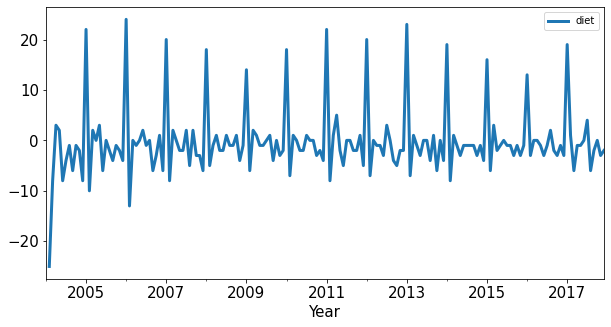

In [ ]:
diet.diff().plot(figsize=(10,5), linewidth=3, fontsize=15)
plt.xlabel('Year', fontsize=15);

Nótese que hemos eliminado gran parte de la tendencia y que puede observarse valores pico cada mes de enero.

# **Ejemplo de preprocesado de datos**


## Procesamiento de datos nulos





El dataset adult.csv fue extraído por Barry Becke de la base de datos de Censos de  1994. Contiene tanto variables numéricas como categóricas. La información de las variables y su contenido se presentan a continuación:

age: continuo \\
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. \\
fnlwgt: continuo. \\
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. \\
education-num: continuo. \\
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. \\
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. \\
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. \\
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. \\
sex: Female, Male. \\
capital-gain: continuo. \\
capital-loss: continuo. \\
hours-per-week: continuo. \\
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 

In [ ]:
#No simbolos por fuera de -,_
#No letras con acentos
#En upper o lower
df.columns.str.upper()

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATION-NUM',
       'MARITAL-STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITALGAIN', 'CAPITALLOSS', 'HOURSPERWEEK', 'NATIVE-COUNTRY',
       'CLASS'],
      dtype='object')

Encontrar el número de valores faltantes por columna

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

In [ ]:
df.shape

(48842, 15)

In [ ]:
# Porcentaje de información faltante
df.isnull().sum()*100/len(df)

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capitalgain       0.000000
capitalloss       0.000000
hoursperweek      0.000000
native-country    1.754637
class             0.000000
dtype: float64

Podemos decir que hay cinco metodologías principales para hacer el tratamiento de los datos nulos:
  
1.  Reemplazar con un valor constante
2. Reemplazar con un valor estadístico  (promedio, media, moda )
3. Ignorar la fila de datos
4.  Hacer un llenado hacia atrás (back-fill) o hacia adelante (forward-fill)
5. Llenado basado en modelos

Los dos primeros ya los cubrimos en la sesión anterior, así que enfoquemonos en los restantes.



In [ ]:
#Caso 1 y 2
#Ubicar los nulos y remplazar por un valor
#df.workclass[df.workclass.isnull()]
#Puedo rellenar con un valor los nulos de la columna
#df.workclass.replace(df.workclass.mode(),None)
wc_nulos_index = df.workclass[df.workclass.isnull()].index
df.loc[wc_nulos_index,'workclass'] = df.workclass.mode().values[0]
#df.workclass.iloc[wc_nulos_index] = df.workclass.mode()
#df.workclass.mode()

In [ ]:
df.workclass.mode().values[0]

'Private'

In [ ]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
df_filtered = df.copy()

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

### Ignorar fila de datos

El comando `dropna()` permite eliminar las filas y/o columnas en las que hayan datos faltantes

In [ ]:
df_filtered=df.dropna()

In [ ]:
print('Número de filas iniciales', len(df))
print('Número de filas después de filtrar', len(df_filtered))
print('Porcentaje de filas eliminadas',(1-len(df_filtered)/len(df))*100)

Número de filas iniciales 48842
Número de filas después de filtrar 45222
Porcentaje de filas eliminadas 7.411653904426519


In [ ]:
df_filtered.iloc[10:20,:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
10,2,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,4,United-States,>50K
11,1,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,2,India,>50K
12,0,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,1,United-States,<=50K
13,1,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,3,United-States,<=50K
15,1,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,2,Mexico,<=50K
16,0,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,1,United-States,<=50K
17,1,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,2,United-States,<=50K
18,2,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,3,United-States,<=50K
19,2,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,2,United-States,>50K
20,2,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,>50K


Note que los índices no cambian. Lo que realiza es la eliminación de la fila (por ejemplo la 14 no está), pero mantiene la indexación. Por tanto, estos no coinciden con el número total de filas. Para reasignar los índices se puede hacer uso del comando `reset_index()`  

In [ ]:
df_filtered.reset_index(drop=True,inplace=True)

In [ ]:
df_filtered.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
45217,1,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,2,United-States,<=50K
45218,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
45219,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
45220,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K
45221,1,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,United-States,>50K


Se puede usar el argumento `subset` para seleccionar solo las columnas sobre las que se desea analizar si hay valores nulos para eliminar las filas 

In [ ]:
df.dropna(subset=['native-country'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,Private,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K


### Llenado con valores vecinos

El comando `fillna()` tiene el argumento `method` que permite hacer un llenado hacia atrás ('bfill') o hacia adelante ('ffill').

Tenga en cuenta que al usar ésta opción si el dato con el que se intenta hacer el llenado también es un NaN, éste permanece.

In [ ]:
df.iloc[25:30,:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
25,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
26,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
27,3,Private,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
28,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
29,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


In [ ]:
df.iloc[25:30,:].fillna(method='bfill')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
25,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
26,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
27,3,Private,180211,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
28,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
29,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


In [ ]:
df.iloc[25:30,:].fillna(method='ffill')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
25,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
26,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
27,3,Private,180211,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
28,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
29,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


### Llenado de datos usando sklearn



Es posible también usar el metodo 'SimpleImputer' de la libreria sklearn para hacer llenado, éste nos permite definir cual estrategia usar para el llenado de los datos (media, mediana o moda).

In [ ]:
from sklearn.impute import SimpleImputer
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

#Crear el objeto (define características iniciales)
imp = SimpleImputer(strategy='most_frequent')
X = df.iloc[25:30,:]
# objetos --> fit, predict, transform, norm, ejc()
# algunos fit_fun
transformed_data = pd.DataFrame(imp.fit_transform(X))
transformed_data



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
1,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
2,3,Private,180211,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
3,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
4,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


### Llenado con modelado 

Una forma muy eficiente, pero más compleja de llenado de datos es convertir la columna a la que deseamos llenarle los datos faltantes y modelarla en función de las columnas sin datos faltantes.

Dependiendo de la clase de dato podemos usar regresiones o clasificaciones. No profundizaremos en ésta estrategia pues aún no conocemos algoritmos de ML para ello.

## Importe de datos

Los datos en crudo se pueden encontrar en la dirrección  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

**Importar panda y matplotlib.pyplot:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Lectura de los datos desde un url

In [ ]:
archivo = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

### Cabecera

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

### Carga de datos desde el url

Para esto usamos el método `read_csv()`

In [ ]:
df = pd.read_csv(archivo, names = headers)

### Inspección del archivo

Recordemos que podemos usar el método head()

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Podemos observar que muchas de las entradas están etiquetadas con el símbolo `?`. Esto corresponde datos faltantes que pueden dificultar un análisis ulterior.

Los pasos que debemos seguir a continuación son:



1.   Identificar los valores faltantes
2.   Tratar los valores faltantes.
3.   Corregir el formato de los datos.



## Identificación de valores faltantes y tratamiento.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.describe(include=object)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,41,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [ ]:
col_obj = df.select_dtypes(include=object).columns

In [ ]:
for i,v in enumerate(col_obj):
  print(v)
  print(df.select_dtypes(include=object).iloc[:,i].unique())

normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type
['gas' 'diesel']
aspiration
['std' 'turbo']
num-of-doors
['two' 'four' '?']
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
engine-type
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num-of-cylinders
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
bore
['3.47' '2.68' '3.19' '3.13' '3.50' 

In [ ]:
df['normalized-losses'].replace('?',np.nan)
#Paso luego de verificar que todo quede correcto
#df['normalized-losses'] = df['normalized-losses'].replace('?',np.nan)

0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

### Conversión de `?` a `NaN`

Quienes llenaron esta tabla, identificaron los valores faltantes como `?`.  Por razones de tiempo de computo y conveniencia, replazaremos estos signos de interrogación por `NaN`, para lo cual debemos importantar antes la librería numéricas de python numpy. 

Para realizar el reemplazo usaremos el método `replace()`.

In [ ]:
import numpy as np

#df.replace("?", np.nan, inplace = True) # No olvidarse de usar inplace.
#df.head(5)
# raw_data (dato fuente sin procesar)
# dev_data (dato para desarrollo o proceso)
# clean_data 
df_dev = df.replace("?",np.nan)

### Identificación y conteo de valores faltantes:

Apliquemos el método `isnull()` y utilicemos la función de agregación `sum()`

In [ ]:
df_dev.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df_dev.shape

(205, 26)

In [ ]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
datos_faltantes = df_dev.isna().sum()
datos_faltantes[datos_faltantes !=0].sort_values()*100/df_dev.shape[0]

num-of-doors          0.97561
horsepower            0.97561
peak-rpm              0.97561
bore                  1.95122
stroke                1.95122
price                 1.95122
normalized-losses    20.00000
dtype: float64

In [ ]:
df_dev[datos_faltantes[datos_faltantes !=0].index.values].describe()

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price
count,164,203,201,201,203,203,201
unique,51,2,38,36,59,23,186
top,161,four,3.62,3.40,68,5500,8921
freq,11,114,23,20,19,37,2


De acuerdo a la información anterior tenemos los siguientes datos faltantes.
<ol>
    <li>"normalized-losses": 41 </li>
    <li>"num-of-doors": 2 </li>
    <li>"bore": 4 </li>
    <li>"stroke" : 4 </li>
    <li>"horsepower": 2 </li>
    <li>"peak-rpm": 2 </li>
    <li>"price": 4 </li>
</ol>

In [ ]:
#Pregunta de Andrea
#null_for_rows = df_dev.isnull().sum(axis=1)
#index_much_null= null_for_rows[null_for_rows>2].index.values
#df_dev.iloc[index_much_null,:]
#df_dev.drop(index_much_null)

## Tratamiento de los datos faltantes

<ol>
    <li>Eliminar el dato entero<br>
        a. Eliminar la fila entera<br>
        b. Eliminar la columna entera
    </li>
    <li>Reemplazar el dato<br>
        a. Reemplazar por la media<br>
        b. Reemplazar por la moda<br>
        c. Reemplazar basados en otra función
    </li>
</ol>

Solo debemos eliminar una columna si la mayoria de entradas son vacias. En nuestro caso, ninguna de las columnas cumplen con este criterio como para ser eliminadas. 

En este caso tenemos cierta libertad para aplicar diferences métodos de llenado de datos faltantes; no obstante, algunos métodos pueden resultar más adecuados que otros. Aplicaremos los siguientes métodos para cada columna:

<b>Reemplazo por la media:</b>
<ul>
    <li>"normalized-losses": 41 datos faltantes</li>
    <li>"stroke": 4 datos faltantes</li>
    <li>"bore": 4 datos faltantes</li>
    <li>"horsepower": 2 datos faltantes</li>
    <li>"peak-rpm": 2 datos faltantes</li>
</ul>

<b>Replace por la moda:</b>
<ul>
    <li>"num-of-doors": 2 dátos faltantes que serán reemplazados por "four". 
        <ul>
            <li>Razón: 84% de los sedan son 4 puertas. Dado que los carros cuatro puertas son los más frecuentes, la probabilidad de ocurrencia es mayor.</li>
        </ul>
    </li>
</ul>

<b>Eliminación de una fila entera:</b>
<ul>
    <li>"price": 4 datos faltantes
        <ul>
            <li>Razón: Como, eventualmente, el precio es algo que se puede predecir, ninguna entrada sin precio puede ser usada para una predicción; por ende, cualquier fila sin precio no será útil.</li>
        </ul>
    </li>
</ul>

### Cálculo del valor medio

In [ ]:
avg_norm_loss = df_dev["normalized-losses"].astype("float").mean(axis=0)
print("Promedio de normalized-losses:", avg_norm_loss)

Promedio de normalized-losses: 122.0


Reemplazo de  "NaN" por el promedio en la columna "normalized-losses":

In [ ]:
df_dev["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Calculo del valor medio para la columna 'bore':

In [ ]:
df_dev['bore'].astype('float').agg(['mean','std','max','min'])

mean    3.329751
std     0.273539
max     3.940000
min     2.540000
Name: bore, dtype: float64

In [ ]:
avg_bore=df_dev['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


Reemplazo de `NaN` por  el valor medio

In [ ]:
df_dev["bore"].replace(np.nan, avg_bore, inplace=True)

**Ejercicio: De acuerdo a lo anterior reemplace los valores faltantes de la columna stroke por su valor medio**

De doble click <b>aquí</b> para ver la solución:

<!-- The answer is below:

# Cálculo del valor medio:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# Reemplazo de los valores faltantes por el valor medio
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

-->

In [ ]:
df_dev["stroke"].replace(np.nan, df_dev["stroke"].astype(float).mean(), inplace=True)

Cálculo del valor medio de la columna 'horsepower' y reemplazo en los valores faltantes:

In [ ]:
avg_horsepower = df_dev['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df_dev['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


Columna de 'peak-rpm':

In [ ]:
avg_peakrpm=df_dev['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df_dev['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


Para ver cuáles valores están presentes en una columna particular, podemos usar el método `value_counts()`:

In [ ]:
df_dev['num-of-doors'].value_counts()/df_dev.shape[0]

four    0.556098
two     0.434146
Name: num-of-doors, dtype: float64

Vemos que los carros de cuatro puertas son los más comunes. También podemos usar el método `.idxmax()` para calcular el tipo más común automaticamente:

In [ ]:
df_dev[df_dev['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [ ]:
df_dev[df_dev['body-style']=='sedan']['num-of-doors'].value_counts()

four    79
two     15
Name: num-of-doors, dtype: int64

In [ ]:
df_dev['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
df_dev['num-of-doors'].mode()

0    four
dtype: object

Reemplazamos en la columna 'num-of-doors' los valores vacios por la moda:

In [ ]:
df_dev["num-of-doors"].replace(np.nan, "four", inplace=True)

Finalmente, eliminemos todas las filas de carros sin precios:

In [ ]:
# Eliminación de columnas sin precio mediante dropna
df_dev.dropna(subset=["price"], axis=0, inplace=True)

# Reinicio de los indices
df_dev.reset_index(drop=True, inplace=True)

Apariencia de la tabla luego de preprocesarla

In [ ]:
df_dev.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df_dev.shape

(201, 26)

## Corrección de datos

<p>El último paso en el preprocesado de los datos consiste en revisar de que todos los datos estén en el formato adecuado(int, float, text u otro).</p>

Podemos usar en Pandas
<p><b>.dtypes()</b>  para ver el tipo</p>
<p><b>.astype()</b> para cambiar el tipo</p>

### Lista de tipos

In [ ]:
df_dev.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p> Se puede observa que algunas columnas no tienen el tipo correcto.
  
  Las variables numéricas deben ser de tipo 'float' o 'int', y las variables con caracteres, como categorias, deben ser del tipo 'object'. Por ejemplo, 'bore' (diámetro del cilindro) y 'stroke' (ciclos/tiempos) son variables numéricas que describen el motor, esperamos entonces que sean de tipo 'float' o 'int'; no obstante, son de tipo 'object'. Debemos convertirlas a un tipo adecuado usantdo el método "astype()".</p> 

### Conversión al tipo adecuado

In [ ]:
df_clean = df_dev.copy()

In [ ]:
df_clean[["bore", "stroke"]] = df_clean[["bore", "stroke"]].astype("float")
df_clean[["normalized-losses"]] = df_clean[["normalized-losses"]].astype("int")
df_clean[["price"]] = df_clean[["price"]].astype("float")
df_clean[["peak-rpm"]] = df_clean[["peak-rpm"]].astype("float")

In [ ]:
df_clean.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Hemos obtenido, finalmente, un conjunto de datos correcto, sin datos faltantes y en un formato correcto.

### Resolviendo preguntas de reemplazo

In [ ]:
df_clean.make.str.replace("r","")

0      alfa-omeo
1      alfa-omeo
2      alfa-omeo
3           audi
4           audi
         ...    
196        volvo
197        volvo
198        volvo
199        volvo
200        volvo
Name: make, Length: 201, dtype: object

In [ ]:
def fun_make_sel(v):
  if v=='bmw':
    return "CUALQUIER COSA"
  elif v=="audi":
    return "OTRA COSA" 
  else:
    return v



In [ ]:
df_clean[['make']].applymap(fun_make_sel)

,make
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,OTRA COSA
4,OTRA COSA
...,...
196,volvo
197,volvo
198,volvo
199,volvo


In [ ]:
fecha = "5 de Agosto de 2021"
if len(fecha.split(" ")[0])<2:
  new_fecha = "0" + fecha.replace("de","").replace(" ","").replace("Agosto","08")
else:
  new_fecha = fecha.replace("de","").replace(" ","").replace("Agosto","08")

new_fecha
#%d%m%Y

'05082021'

## Estandarización de datos

<p>
Los datos se recolectan, normalmente, de diferentes concesionarios, con diferentes formatos.
(La estandarización de datos se refiere también a un tipo particular de normalización, en donde se extrae el promedio y se divíde por la desviación estándar.)
</p>
    
<b>¿Qué es la estandarización?</b>
<p>La estandarización es el proceso de transformar unos datos en un formato común que permita a los investigadores realizar comparaciones significativas.
</p>

<b>Ejemplo</b>
<p>Transformar mpg (millas por galon) a L/100km (Litros por cada 100 km):</p>
<p>En el conjunto de datos, "city-mpg" y "highway-mpg" están representadas en unidades de mpg. En europa, por ejemplo, el consumo se da en L/100km </p>
<p>Debemos aplicar una <b>transformación de los datos</b> para pasar de  mpg a L/100km?</p>

<p>La conversión es<p>
L/100km = 235 / mpg
<p>Podemos aplicar en Pandas operaciones matemáticas directamente para lograr este fin.</p>

In [ ]:
df_clean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [ ]:
# Conversión de mpg a L/100km
df_clean['city-L/100km'] = 235/df_clean["city-mpg"]

# Visualización de la operación
df_clean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


**Ejercicio:** De acuerdo con el procedimiento anterior, transforme mpg a L/100km en la columna de "highway-mpg", y cambie el nombre de la columna a highway-L/100km".

De doble click <b>aquí</b> para ver la solución.

<!-- 

# mpg a L/100km
df["highway-mpg"] = 235/df["highway-mpg"]

# renombre de "highway-mpg" a "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# visualización del conjunto de datos
df.head()

-->

In [ ]:
df_clean['highway-L/100km'] = 235/df_clean["highway-mpg"]

## Normalización de los datos

<b>¿Por qué debemos aplicar normalización?</b>
<p>La normalización es el proceso de transforma valores de varias variables a un rango similar. Normalmente, la normalización incluye un escalado de las varialbres de tal forma que el promedio sea 0 y la varianza 1, o escalar las variables de tal forma que el rango esté definido entre 0 y 1.
</p>

<b>Ejemplo</b>
<p>Supongamos que queremos rescalar las columnas "length", "width" and "height" </p>
<p><b>Objetivo:</b> Normalizar las variables a un rango de 0 a 1.</p>
<p><b>Métodología:</b> reemplazar el valor por (value original)/(valor máximo)</p>

In [44]:
df_clean['length'] = df_clean['length']/df_clean['length'].max()
df_clean['width'] = df_clean['width']/df_clean['width'].max()
df_clean['height'] = df_clean['height']/df_clean['height'].max()

**Ejercicio:** Normalice la columna "heigh".

De doble click <b>aquí</b> para ver la solución.

<!--

df['height'] = df['height']/df['height'].max() 
# Mostrar las columnas normalizadas.
df[["length","width","height"]].head()

-->

Podemos observar como el rango queda definido entre 0 y 1

## Bineado de los datos

<b>Por qué binear?</b>
<p>
    Binear es el proceso que consiste en transformar una variable numérica continua en bines categoricos discretos, con el fin de realizar un analisis por grupos.
</p>

<b>Ejemplo: </b>
<p>En nuestra base de datos, "horsepower" es una variable real que varia desde 48 a 288, tiene 57 valores únicos. Que pasaría si quisieramos discriminar entre diferentes precios dependiendo de si se trata de un "horsepower" alto, medio o bajo? Podemos reorganizarlos en bines para un analisis más simple? </p>

<p>Usemos el método de pandas `cut` para partiro en tres bines: </p>

<p>Primero convirtamos "horsepower al formato correcto:" </p>

In [46]:
df_clean["horsepower"] = df_clean["horsepower"].astype(int, copy=True)

Realicemos un histograma de esta variable para ver como están distribuida:

Text(0.5, 1.0, 'horsepower bins')

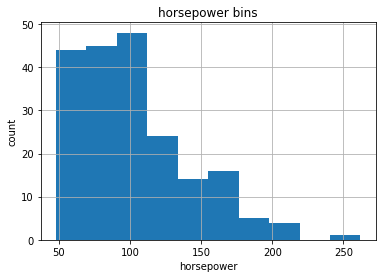

In [47]:
import matplotlib.pyplot as plt
df_clean.horsepower.hist()
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

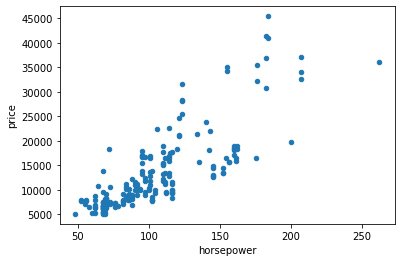

In [48]:
df_clean.plot(kind='scatter',x='horsepower',y='price')
#df_clean.boxplot(column='horsepower',h='price')

<p> Para establecer 3 bines de ancho igual, usamos la función de numpy <code>linspace(start_value, end_value, numbers_generated)</code> .</p>
<p>En estos casos tendríamos que</p>
 <p>start_value=min(df["horsepower"]).</p>
<p>end_value=max(df["horsepower"]).</p>
<p>Como queremos crea  3 bines del mismo ancho, usamos 4 como divisor /numbers_generated=4)</p>

In [49]:
bins = np.linspace(min(df_clean["horsepower"]), max(df_clean["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Nombre de los grupos

In [50]:
group_names = ['Low', 'Medium', 'High']

Aplicaciónde la función "cut"  para determinar que valor de "df['horsepower']" pertenece a qué categoría. 

In [51]:
df_clean['horsepower-binned'] = pd.cut(df_clean['horsepower'], bins, labels=group_names, include_lowest=True )
df_clean[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Veamos las cuentas por cada bin:

In [52]:
df_clean["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Grafiquemos como están distribuidos por estas categorias la columna "horsepower"

Text(0.5, 1.0, 'horsepower bins')

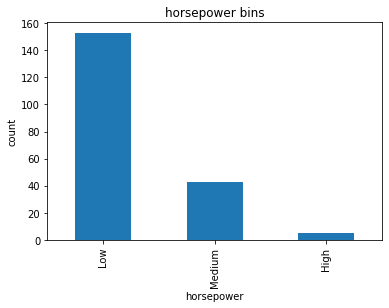

In [ ]:
import matplotlib.pyplot as plt
df_clean["horsepower-binned"].value_counts().plot(kind='bar')
# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [ ]:
df_clean.groupby("horsepower-binned")['price'].agg(['mean','std'])

,mean,std
horsepower-binned,,
Low,9989.751634,3723.679659
Medium,22486.465116,8865.840135
High,31856.600000,7015.770364


In [ ]:
df_clean[["horsepower","price"]].agg(['mean','std'])

,horsepower,price
mean,103.402985,13207.129353
std,37.365650,7947.066342


## Visualización de los bins

Normalmente,  un histograma se crea para ver la distribución de los bines que creamos arriba:

Text(0.5, 1.0, 'horsepower bins')

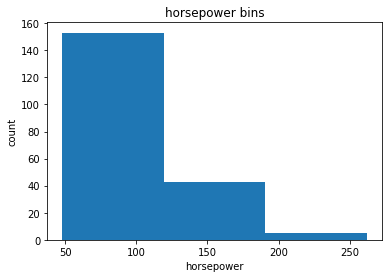

In [ ]:
import matplotlib.pyplot as plt

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df_clean["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

En la gráfica anterior se muestra el resultado del bineado para el atributo "horsepower"

#**Transformaciones**

## Agrupando dataframes
El comando `groupby` permite agrupar y generar calculos y operaciónes sobre los valores agrupados.

In [ ]:
df_clean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Low


In [65]:
group = df_clean.groupby(['make','num-of-doors']) 
group

In [66]:
for g in group:
  print(g[0])
  print(g[1])
  break

('alfa-romero', 'two')
   symboling  normalized-losses  ... highway-L/100km horsepower-binned
0          3                122  ...        8.703704               Low
1          3                122  ...        8.703704               Low
2          1                122  ...        9.038462            Medium

[3 rows x 29 columns]


In [67]:
group.get_group(('alfa-romero', 'two'))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium


In [70]:
group.groups.keys()

dict_keys([('alfa-romero', 'two'), ('audi', 'four'), ('audi', 'two'), ('bmw', 'four'), ('bmw', 'two'), ('chevrolet', 'four'), ('chevrolet', 'two'), ('dodge', 'four'), ('dodge', 'two'), ('honda', 'four'), ('honda', 'two'), ('isuzu', 'four'), ('isuzu', 'two'), ('jaguar', 'four'), ('jaguar', 'two'), ('mazda', 'four'), ('mazda', 'two'), ('mercedes-benz', 'four'), ('mercedes-benz', 'two'), ('mercury', 'two'), ('mitsubishi', 'four'), ('mitsubishi', 'two'), ('nissan', 'four'), ('nissan', 'two'), ('peugot', 'four'), ('plymouth', 'four'), ('plymouth', 'two'), ('porsche', 'two'), ('renault', 'four'), ('renault', 'two'), ('saab', 'four'), ('saab', 'two'), ('subaru', 'four'), ('subaru', 'two'), ('toyota', 'four'), ('toyota', 'two'), ('volkswagen', 'four'), ('volkswagen', 'two'), ('volvo', 'four')])

In [71]:
#summary, agrement, agregación, resumen...
group.mean()['price']

make           num-of-doors
alfa-romero    two             15498.333333
audi           four            18381.000000
               two             15250.000000
bmw            four            26047.000000
               two             26238.333333
chevrolet      four             6575.000000
               two              5723.000000
dodge          four             7601.800000
               two              8217.500000
honda          four             9335.000000
               two              7465.750000
isuzu          four             6785.000000
               two             11048.000000
jaguar         four            33900.000000
               two             36000.000000
mazda          four            11436.750000
               two              9956.111111
mercedes-benz  four            32108.800000
               two             36210.666667
mercury        two             16503.000000
mitsubishi     four             8434.000000
               two              9597.888889
niss

In [73]:
df_clean.groupby("make")["price"].std()#/df_clean.price.mean()

make
alfa-romero      1734.937559
audi             3452.379493
bmw              9263.832033
chevrolet         754.421633
dodge            2213.386044
honda            2061.672112
isuzu            3014.396208
jaguar           2047.559523
mazda            3975.682094
mercedes-benz    6789.560306
mercury                  NaN
mitsubishi       3042.998690
nissan           4477.394200
peugot           2246.749673
plymouth         2395.544257
porsche          6528.784343
renault           424.264069
saab             2860.794761
subaru           1940.191468
toyota           3204.982114
volkswagen       2178.549872
volvo            3314.650263
Name: price, dtype: float64

In [ ]:
df_clean.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [74]:
#df_clean.groupby("make")["price"].std()
df_clean.groupby(["make",'num-of-doors']).count()

symboling  ...  horsepower-binned
make          num-of-doors             ...                   
alfa-romero   two                   3  ...                  3
audi          four                  5  ...                  5
              two                   1  ...                  1
bmw           four                  5  ...                  5
              two                   3  ...                  3
chevrolet     four                  1  ...                  1
              two                   2  ...                  2
dodge         four                  5  ...                  5
              two                   4  ...                  4
honda         four                  5  ...                  5
              two                   8  ...                  8
isuzu         four                  1  ...                  1
              two                   1  ...                  1
jaguar        four                  2  ...                  2
              two                   1  ...                  1
mazda         four                  8  ...                  8
              two                   9  ...                  9
mercedes-benz four                  5  ...                  5
              two                   3  ...                  3
mercury       two                   1  ...                  1
mitsubishi    four                  4  ...                  4
              two                   9  ...                  9
nissan        four                  9  ...                  9
              two                   9  ...                  9
peugot        four                 11  ...                 11
plymouth      four                  4  ...                  4
              two                   3  ...                  3
porsche       two                   4  ...                  4
renault       four                  1  ...                  1
              two                   1  ...                  1
saab          four                  3  ...                  3
              two                   3  ...                  3
subaru        four                  9  ...                  9
              two                   3  ...                  3
toyota        four                 18  ...                 18
              two                  14  ...                 14
volkswagen    four                  8  ...                  8
              two                   4  ...                  4
volvo         four                 11  ...                 11

[39 rows x 27 columns]

### Agrupación por distintas funciones de agregación

In [75]:
df2 = pd.DataFrame({"Person": ["John", "Myla", "Lewis", "John", "Myla", "Lewis", "John", "Myla"], 
                    "Age": [24, 55, 24, 21, 26, 54, 64, 55], "month":[1,1,1,3,3,3,5,5]})
df2.head(8)

,Person,Age,month
0,John,24,1
1,Myla,55,1
2,Lewis,24,1
3,John,21,3
4,Myla,26,3
5,Lewis,54,3
6,John,64,5
7,Myla,55,5


In [76]:
df2.dtypes

Person    object
Age        int64
month      int64
dtype: object

In [77]:
df2[df2.Person.str.startswith('L')] 

,Person,Age,month
2,Lewis,24,1
5,Lewis,54,3


In [80]:
df2.groupby("Person").max()['Age']

Person
John     64
Lewis    54
Myla     55
Name: Age, dtype: int64

In [81]:
# Agrupar por persona y aplicar "min" a "Age"
df2.groupby("Person").agg(["min","max"])             

Age     month    
       min max   min max
Person                  
John    21  64     1   5
Lewis   24  54     1   3
Myla    26  55     1   5

In [ ]:
df2.groupby("Person").count()

,Age,month
Person,,
John,3,3
Lewis,2,2
Myla,3,3


In [82]:
# Agrupar por persona y edad y aplicar "count" a "Age"
df2.groupby("Person").agg({"Age":"mean","month":"max"})

,Age,month
Person,,
John,36.333333,5
Lewis,39.000000,3
Myla,45.333333,5


In [83]:
df2.groupby("Person").agg({"Age":["mean","std"],"month":np.sum})

Age            month
             mean        std   sum
Person                            
John    36.333333  24.006943     9
Lewis   39.000000  21.213203     4
Myla    45.333333  16.743158     9

In [ ]:
# frecuencia de las edades
df2['Age'].value_counts()
#df2["Age"].value_counts(Normlize=True)

55    2
24    2
54    1
21    1
26    1
64    1
Name: Age, dtype: int64

## Concatenación y combinación de dataframes

La concatenación se realiza mediante la función `concat()` y la combinación mediante la función `merge()`

Revisar esta [página](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [84]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

In [87]:
(data1.columns == data2.columns).all()

True

In [89]:
# Concatenar por filas
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [104]:
# Concatenar por columnas
all_data_col = pd.concat([data1, data2], axis = 1,keys=['data1', 'data2'])
all_data_col

data1                           data2                     
  subject_id first_name last_name subject_id first_name last_name
0          1       Alex  Anderson          4      Billy    Bonder
1          2        Amy  Ackerman          5      Brian     Black
2          3      Allen       Ali          6       Bran   Balwner
3          4      Alice      Aoni          7      Bryce     Brice
4          5     Ayoung   Atiches          8      Betty    Btisan

In [93]:
all_data_col.columns

Index(['subject_id', 'first_name', 'last_name', 'subject_id', 'first_name',
       'last_name'],
      dtype='object')

In [92]:
all_data_col['subject_id']

,subject_id,subject_id
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


In [109]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [105]:
# Combinar all_data y data3 a lo largo del valor de subject_id
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [110]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (interseccion)
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [111]:
# Combinar solo los datos que tienen el mismo 'subject_id' en data1 y data2 (union)
pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


# Manipulación de variables categóricas

Las variables categóricas son aquellas que contienen etiquetas en vez de valores numéricos. Exiten variables categóricas ordinales y nominales, las primeras son aquellas que tienen algún tipo de jeraquización, como por ejemplo el nivel de escolaridad:*primaria, secundaria, universitaria*; las segunas son aquellas que no se pueden ordenar como profesión: *abogado, médico, ingeniero* . Según el problema que se desea resolver y el tipo de variables categóricas, estás deben tener un tratamiento diferente.

Para ver más tipos de codificación ver el siguente [link](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159)

## Operaciones vectorizadas con `strings`

Python ofrece una relativa facilidad en el manejo y manipulación de datos de tipo `str`. Pandas se basa en esto y proporciona un conjunto integral de operaciones vectorizadas

NumPy no proporciona un acceso tan simple. Por ejemplo, para escribir con mayúscula la primera letra de las entradas de un arreglo podemos escribir:



In [ ]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']       
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

Quizás esto sea suficiente para trabajar con algunos datos, pero no funcionará si faltan valores:

In [ ]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']       
try:
  [s.capitalize() for s in data]
except Exception as e:
  print(e)

'NoneType' object has no attribute 'capitalize'


Pandas incluye opciones para abordar tanto el manejo de operaciones vectorizadas como el manejo correcto de los datos faltantes a través del atributo `str` de los objetos `series` e `index` de Pandas

In [ ]:
names = pd.Series(data)    
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

Realicemos la operación anterior mediante el atributo `str` (note que se omiten los valores nulos)


In [ ]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [ ]:
names.isnull()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [ ]:
names = pd.DataFrame({"nombre":['peter', 'Paul', 6.9, 'MARY', 'gUIDO'],"nivel":['n1','n1','n4',5,'n7']})
names

,nombre,nivel
0,peter,n1
1,Paul,n1
2,6.9,n4
3,MARY,5
4,gUIDO,n7


In [ ]:
names.nivel.str.capitalize().isna().sum()

1

Casi todos los métodos incorporados de Python para el manejo de cadenas se reflejan en un método de vectorizado de cadenas de Pandas. Algunos de estos métodos son

*   `len()`
*   `lower()`
* `upper()`
*  `startswith()`
* `contains()`
*  `split()`
* `get()`
* `strip()`
* `replace()`



In [ ]:
monte = pd.Series([' Graham Chapman ', ' John Cleese', 'Terry Gilliam ', 'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0     Graham Chapman 
1         John Cleese
2      Terry Gilliam 
3           Eric Idle
4         Terry Jones
5       Michael Palin
dtype: object

In [ ]:
# entradas en letra minúscula (str)
monte.str.lower() 

0     graham chapman 
1         john cleese
2      terry gilliam 
3           eric idle
4         terry jones
5       michael palin
dtype: object

In [ ]:
# si la entrada contiene la letra T (bol)
monte.str.contains('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [ ]:
# separar por palabra (list)
monte.str.split(" ")

0    [, Graham, Chapman, ]
1         [, John, Cleese]
2       [Terry, Gilliam, ]
3             [Eric, Idle]
4           [Terry, Jones]
5         [Michael, Palin]
dtype: object

In [ ]:
# obtener el apellido de cada entrada
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

Para una guia completa visitar: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

## Variables ordinales: Codificación de enteros

La codificación entera (Integer Encoding) consiste en asignar un valor entero a cada uno de los valores ordenados, según correponda.  

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


Este tipo de implementación ya está hecha en el dataset para el caso del nivel educativo en las columnas education y education-num

In [ ]:
df[['education','education-num']].drop_duplicates().sort_values(by='education-num')

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


Con la función map es fácil de implementar en python. Por ejemplo para la columa class índiquemos con $1$ los $\leq 50$ y con $2$ los $>50$

In [ ]:
df['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
df['class-num'] = df['class'].map({'<=50K':1, '>50K':2}) #{vunique[i]:i+1 for i in range(len(vunique))}

In [ ]:
df[['class-num','class']].head()

,class-num,class
0,1,<=50K
1,1,<=50K
2,1,<=50K
3,1,<=50K
4,1,<=50K


Podemos también convertir una columna a *category* y luego utilizar esos valores categóricos para la codificación entera. Por ejemplo, realicemos este proceso para la columna *workclass*. Convirtamos la columna al tipo *category*:

In [ ]:
df["workclass"] = df["workclass"].astype("category")
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education           object
education-num        int64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capitalgain          int64
capitalloss          int64
hoursperweek         int64
native-country      object
class               object
class-num            int64
dtype: object

Luego podemos asignar la variable codificada a una nueva columna utilizando `cat.codes`


In [ ]:
df["workclass_code"] = df["workclass"].cat.codes

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,class-num,workclass_code
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,1,6
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,1,5
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,1,3
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,1,3
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K,1,3


In [ ]:
df[['workclass','workclass_code']].drop_duplicates().sort_values(by='workclass_code')

,workclass,workclass_code
27,NaN,-1
22,Federal-gov,0
25,Local-gov,1
5361,Never-worked,2
2,Private,3
54,Self-emp-inc,4
1,Self-emp-not-inc,5
0,State-gov,6
1901,Without-pay,7


## Variables nominales: Condificación one-hot (dummy variables)
La codificación one-hot consiste asignar valores binarios $[1, 0]$ a las variables categóricas, en las que cada valor de la variable se convierte en un campo nuevo y se asigna el valor $[1, 0]$ si el evento contiene o no la variable según sea el caso.


In [ ]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

Pandas viene con el comando `pd.get_dummies()` que facilita el trabajo y realiza la codeificación one-hot de forma muy sencilla. Note que al implementar este comando, el campo `sex` se elimina y solo quedan las variables dummy

In [ ]:
pd.concat([df.sex, pd.get_dummies(df.sex,drop_first=True)],axis=1).head()

,sex,Male
0,Male,1
1,Male,1
2,Male,1
3,Male,1
4,Female,0


Se puede implementar para el dataset completo y el comando `pd.get_dummies()` solo aplica sobre las variables categóricas.

In [ ]:
pd.get_dummies(df).head()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,class-num,workclass_code,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,...,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_<=50K,class_>50K
0,2,77516,13,1,0,2,1,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3,83311,13,0,0,0,1,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,215646,9,0,0,2,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,234721,7,0,0,2,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,338409,13,0,0,2,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Aplicar este tipo de codificación puede aumentar significativamente el número de variables. Esto depende de la cantidad de posibles valores que tengan las variables categóricas

In [ ]:
df.shape

(48842, 17)

In [ ]:
pd.get_dummies(df).shape

(48842, 109)